In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import scipy

%matplotlib inline

//anaconda/envs/mypy27/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Visualize grouping by borough and violation type

In [68]:
crime_df = pd.read_csv('crime_by_boro_type.out', header=None)
crime_df.sort([0, 1], inplace=True)
crime_df

/anaconda/envs/mypy27/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,0,1,2
17,BRONX,FELONY,294643
14,BRONX,MISDEMEANOR,677215
6,BRONX,VIOLATION,131656
5,BROOKLYN,FELONY,495909
11,BROOKLYN,MISDEMEANOR,844865
13,BROOKLYN,VIOLATION,185439
3,MANHATTAN,FELONY,385885
10,MANHATTAN,MISDEMEANOR,705614
2,MANHATTAN,VIOLATION,124750
7,QUEENS,FELONY,338472


In [69]:
crime_df.iloc[15:][0] = 'UNKNOWN'

/anaconda/envs/mypy27/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [97]:
crime_table = crime_df.pivot_table(values=2, index=[0], columns=[1], aggfunc=np.sum)
Population = [1455444, 2636735, 1644518, 2339150, 474558, 1000000]
crime_table


1,FELONY,MISDEMEANOR,VIOLATION
0,,,
BRONX,294643,677215,131656
BROOKLYN,495909,844865,185439
MANHATTAN,385885,705614,124750
QUEENS,338472,544291,128239
STATEN ISLAND,52224,146443,45123
UNKNOWN,290,146,27


In [99]:
crime_table_pc = (crime_table.T / Population).T
crime_table_pc

1,FELONY,MISDEMEANOR,VIOLATION
0,,,
BRONX,0.202442,0.465298,0.090458
BROOKLYN,0.188077,0.320421,0.070329
MANHATTAN,0.234649,0.429070,0.075858
QUEENS,0.144699,0.232688,0.054823
STATEN ISLAND,0.110048,0.308588,0.095084
UNKNOWN,0.000290,0.000146,0.000027


In [71]:
#Calculate fraction by row (e.g. Bronx Felonies / Total Bronx Crimes)
#crime_table.FELONY_FRAC = crime_table.FELONY / crime_table.sum(axis=1)
#crime_table.MISDEMEANOR_FRAC = crime_table.MISDEMEANOR / crime_table.sum(axis=1)
#crime_table.VIOLATION_FRAC = crime_table.VIOLATION / crime_table.sum(axis=1)

In [72]:
#Calculate fraction by column (e.g. Bronx Felonies / Total Felonies)
crime_table.FELONY_FRAC = crime_table['FELONY'] / crime_table['FELONY'].sum()
crime_table.MISDEMEANOR_FRAC = crime_table['MISDEMEANOR'] / crime_table['MISDEMEANOR'].sum()
crime_table.VIOLATION_FRAC = crime_table['VIOLATION'] / crime_table['VIOLATION'].sum()

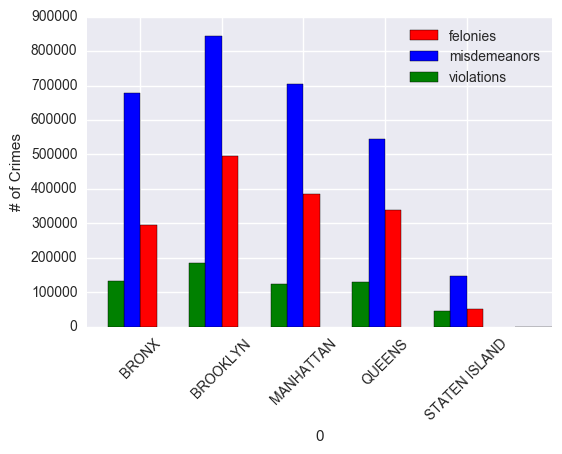

In [73]:
#Total no. of crimes
width = 0.2
crime_table['FELONY'].plot(kind='bar', color='red', width=width, position=0, label = 'felonies')
crime_table['MISDEMEANOR'].plot(kind='bar', color='blue', width=width, position=1, label = 'misdemeanors')
crime_table['VIOLATION'].plot(kind='bar', color='green', width=width, position=2, label = 'violations')
plt.xticks(np.arange(0,5),('BRONX', 'BROOKLYN','MANHATTAN','QUEENS', 'STATEN ISLAND','UNKNOWN'), rotation=45)
plt.ylabel('# of Crimes')
plt.legend()
plt.savefig('crimes_by_boro_type.png', format='png')

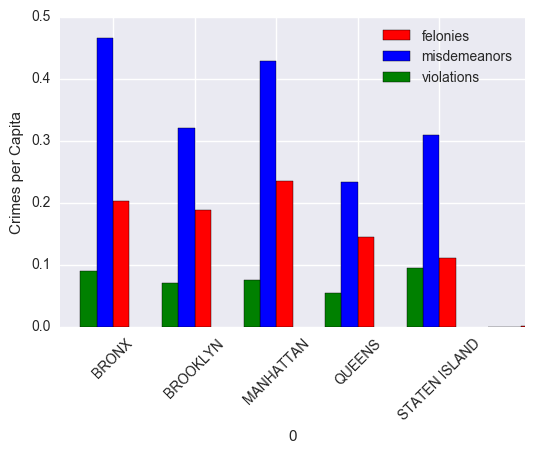

In [100]:
#Crimes per capita
width = 0.2
crime_table_pc['FELONY'].plot(kind='bar', color='red', width=width, position=0, label = 'felonies')
crime_table_pc['MISDEMEANOR'].plot(kind='bar', color='blue', width=width, position=1, label = 'misdemeanors')
crime_table_pc['VIOLATION'].plot(kind='bar', color='green', width=width, position=2, label = 'violations')
plt.xticks(np.arange(0,5),('BRONX', 'BROOKLYN','MANHATTAN','QUEENS', 'STATEN ISLAND','UNKNOWN'), rotation=45)
plt.ylabel('Crimes per Capita')
plt.legend()

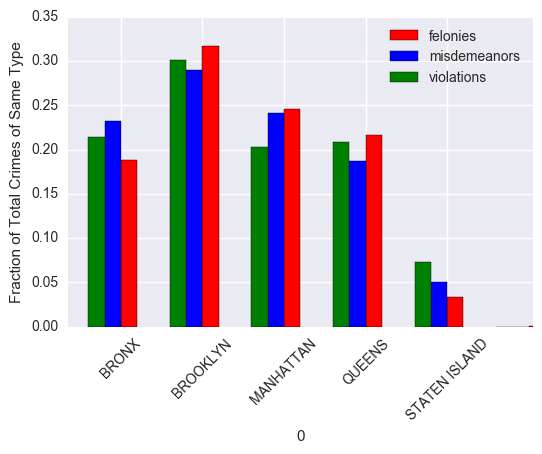

In [74]:
width = 0.2
crime_table.FELONY_FRAC.plot(kind='bar', color='red', width=width, position=0, label = 'felonies')
crime_table.MISDEMEANOR_FRAC.plot(kind='bar', color='blue', width=width, position=1, label = 'misdemeanors')
crime_table.VIOLATION_FRAC.plot(kind='bar', color='green', width=width, position=2, label = 'violations')
plt.xticks(np.arange(0,5),('BRONX', 'BROOKLYN','MANHATTAN','QUEENS','STATEN ISLAND','UNKNOWN'), rotation=45)
plt.ylabel('Fraction of Total Crimes of Same Type')
plt.legend()
plt.savefig('crimes_by_boro_type_proportions.png', format='png')

## Analyzing grouping by boro, DoW and hour

In [360]:
boro_df = pd.read_csv('by_boro_wkday_hr.out', header=None)
boro_df = boro_df.rename(index=str, columns={0: 'boro', 1: 'weekday', 2: 'hour', 3: 'crimes'})
boro_df.boro = boro_df.boro.str.strip(to_strip = "(").str.strip(to_strip = "'")
boro_df.weekday = pd.to_numeric(boro_df.weekday)
boro_df.hour = pd.to_numeric(boro_df.hour.str.strip(to_strip = ")"))
boro_df.crimes = pd.to_numeric(boro_df.crimes.str.strip(to_strip = ")"))

boro_df = boro_df[boro_df.weekday >= 0]
boro_df = boro_df[boro_df.hour <= 24]
boro_df['wkday_hour'] = 24*boro_df.weekday + boro_df.hour
boro_df.tail()

,boro,weekday,hour,crimes,wkday_hour
1152,STATEN ISLAND,6,20,1858,164
1153,STATEN ISLAND,6,21,1694,165
1154,STATEN ISLAND,6,22,1676,166
1155,STATEN ISLAND,6,23,1459,167
1156,STATEN ISLAND,6,24,11,168


In [361]:
table_boros = boro_df.pivot_table(values='crimes', index=['wkday_hour'], columns=['boro'], aggfunc=np.sum)
table_boros.drop('', inplace=True, axis = 1)
table_boros.head()

boro,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
wkday_hour,,,,,
0,6398.0,9858.0,6268.0,6355.0,1581.0
1,4098.0,5981.0,4115.0,4189.0,931.0
2,2866.0,4542.0,3177.0,3196.0,709.0
3,2137.0,3459.0,2757.0,2718.0,485.0
4,1986.0,3104.0,2392.0,2548.0,444.0


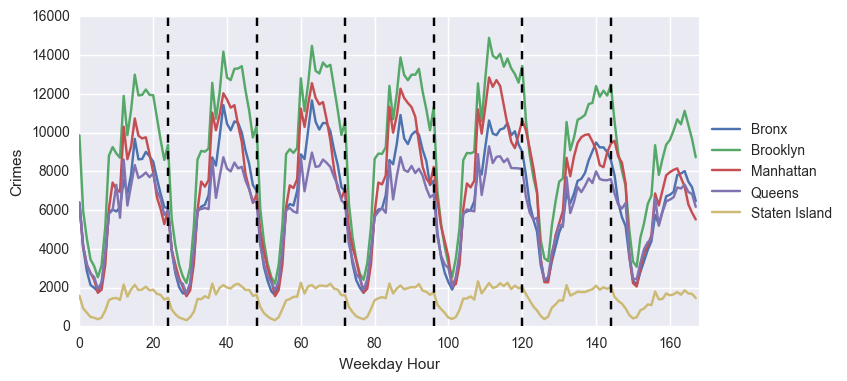

In [351]:
plt.figure(figsize = (8,4))
plt.plot(table_boros.BRONX.iloc[:-1], label='Bronx')
plt.plot(table_boros.BROOKLYN.iloc[:-1], label='Brooklyn')
plt.plot(table_boros.MANHATTAN.iloc[:-1], label='Manhattan')
plt.plot(table_boros.QUEENS.iloc[:-1], label='Queens')
plt.plot(table_boros['STATEN ISLAND'].iloc[:-1], label='Staten Island')
axes = plt.gca()
axes.set_xlim([0,168])

for i in range(1,7):
    plt.axvline(x=24*i,color='k', linestyle='--')
plt.xlabel('Weekday Hour')
plt.ylabel('Crimes')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('crimes_by_boro_wkday_hour.png', format='png')

In [353]:
table_boros_normed = table_boros.copy()
for col in table_boros_normed.columns:
    table_boros_normed[col] = table_boros_normed[col] / table_boros.sum(axis=1).values

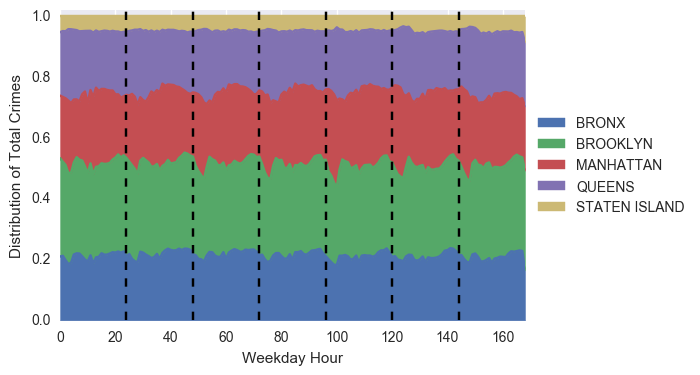

In [359]:
plt.figure(figsize = (8,4))
table_boros_normed.plot.area()
axes = plt.gca()
axes.set_xlim([0,168])
axes.set_ylim([0,1.02])
for i in range(1,7):
    plt.axvline(x=24*i,color='k', linestyle='--')
plt.xlabel('Weekday Hour')
plt.ylabel('Distribution of Total Crimes')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('crimes_by_boro_wkday_hour_prop.png', format='png')

#### Brooklyn appears to maintain its daily peak in crime later into the night than the other boros while Manhattan doesn't reach its valley in crime until later in the early morning compared to the other boros.

## Analyzing the grouping by YMD & Boro

In [134]:
boro_ymd_df = pd.read_csv('by_boro_ymd.out', header=None)
boro_ymd_df = boro_ymd_df.rename(index=str, columns={0: 'boro', 1: 'year', 2: 'month', 3: 'day', 4: 'crimes'})
boro_ymd_df.boro = boro_ymd_df.boro.str.strip(to_strip = "(").str.strip(to_strip = "'")
boro_ymd_df.year = pd.to_numeric(boro_ymd_df.year.str.strip().str.strip(to_strip = '('))
boro_ymd_df.month = pd.to_numeric(boro_ymd_df.month)
boro_ymd_df.day = pd.to_numeric(boro_ymd_df.day.str.strip(to_strip = ")"))

boro_ymd_df = boro_ymd_df[boro_ymd_df.year >= 2000]

boro_ymd_df.crimes = pd.to_numeric(boro_ymd_df.crimes.str.strip(to_strip = ")"))
boro_ymd_df['ymd'] = pd.to_datetime((boro_ymd_df.year*10000+boro_ymd_df.month*100+boro_ymd_df.day).apply(str),format='%Y%m%d')

boro_ymd_df.tail()

,boro,year,month,day,crimes,ymd
24093,STATEN ISLAND,2015,12,27,58,2015-12-27
24094,STATEN ISLAND,2015,12,28,50,2015-12-28
24095,STATEN ISLAND,2015,12,29,43,2015-12-29
24096,STATEN ISLAND,2015,12,30,54,2015-12-30
24097,STATEN ISLAND,2015,12,31,34,2015-12-31


In [135]:
table_boros_ymd = boro_ymd_df.pivot_table(values='crimes', index=['ymd'], columns=['boro'], aggfunc=np.sum)
table_boros_ymd.drop('', inplace=True, axis = 1)
table_boros_ymd = table_boros_ymd.fillna(0)
table_boros_ymd.head()

boro,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
ymd,,,,,
2000-01-01,31.0,39.0,22.0,26.0,10.0
2000-01-02,0.0,1.0,0.0,1.0,0.0
2000-01-04,0.0,1.0,0.0,1.0,1.0
2000-01-05,0.0,2.0,0.0,0.0,0.0
2000-01-07,0.0,1.0,0.0,0.0,0.0


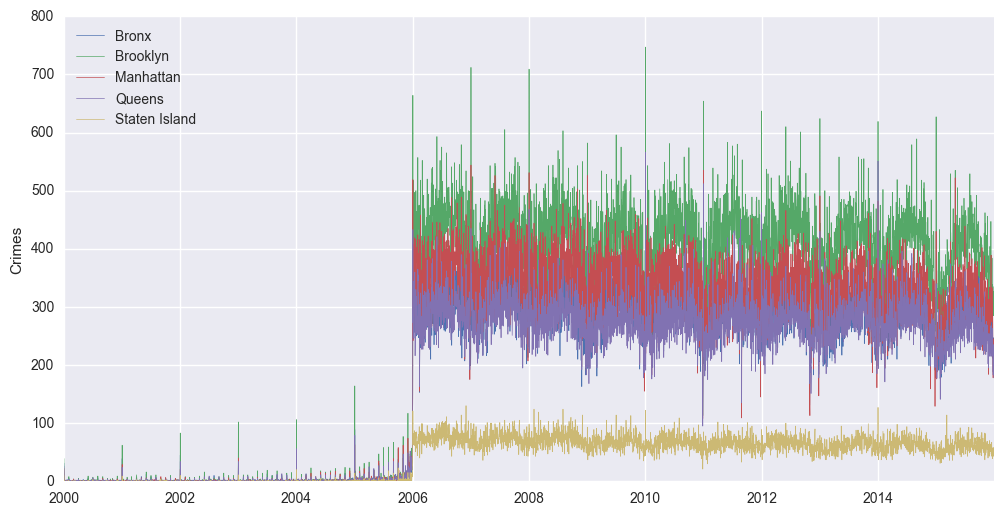

In [141]:
plt.figure(figsize = (12,6))
plt.plot(table_boros_ymd.BRONX.iloc[:-1], label='Bronx', linewidth=0.5)#, alpha = 0.5)
plt.plot(table_boros_ymd.BROOKLYN.iloc[:-1], label='Brooklyn', linewidth=0.5)#, alpha = 0.5)
plt.plot(table_boros_ymd.MANHATTAN.iloc[:-1], label='Manhattan', linewidth=0.5)#, alpha = 0.5)
plt.plot(table_boros_ymd.QUEENS.iloc[:-1], label='Queens', linewidth=0.5)#, alpha = 0.5)
plt.plot(table_boros_ymd['STATEN ISLAND'].iloc[:-1], label='Staten Island', linewidth=0.5)#, alpha = 0.5)
plt.ylabel('Crimes')
plt.legend(loc=2)
plt.savefig('crimes_by_boro_timeseries.png', format='png')

#### There appears to be a data quality issue related to report date where complaints are entered as occuring on the 1st of the month rather than their actual dates. This manifests as an artificial monthly spike in crimes.

In [136]:
#Look for outliers by defining threshold
means = table_boros_ymd.mean(axis=0)
stds = table_boros_ymd.std(axis=0)
up_thresh = means + 2*stds
low_thresh = means - 2*stds

In [137]:
outliers1 = table_boros_ymd > up_thresh
outliers2 = table_boros_ymd < low_thresh
outliers3 = outliers1 | outliers2

In [138]:
outliers3.sum(axis=0)

boro
BRONX             0
BROOKLYN          3
MANHATTAN         1
QUEENS            7
STATEN ISLAND    13
dtype: int64

#### We have 24 potential outlier dates to examine, though most are likely a result of the 'First of the Month' data quality issue mentioned above

In [139]:
table_boros_ymd[outliers3['BROOKLYN']]['BROOKLYN']

ymd
2007-01-01    712.0
2008-01-01    709.0
2010-01-01    747.0
Name: BROOKLYN, dtype: float64

In [121]:
table_boros_ymd[outliers3['MANHATTAN']]['MANHATTAN']

ymd
2007-01-01    544.0
Name: MANHATTAN, dtype: float64

In [122]:
table_boros_ymd[outliers3['QUEENS']]['QUEENS']

ymd
2008-01-01    468.0
2010-01-01    566.0
2010-09-11    449.0
2011-01-01    512.0
2011-08-22    453.0
2012-01-01    462.0
2014-01-01    551.0
Name: QUEENS, dtype: float64

In [123]:
table_boros_ymd[outliers3['STATEN ISLAND']]['STATEN ISLAND']

ymd
2006-01-01    121.0
2006-08-01    111.0
2006-11-01    114.0
2006-12-01    130.0
2008-02-01    124.0
2008-03-01    119.0
2008-08-01    124.0
2008-12-01    114.0
2009-07-01    114.0
2009-10-01    113.0
2010-01-01    122.0
2014-01-01    127.0
2015-03-09    114.0
Name: STATEN ISLAND, dtype: float64

### Removing entries that occur on the first of the month, we get 2010-09-11 & 2011-08-22 in Queens and 2015-03-09 in Staten Island as having unusually high number of crimes